# Understanding rates of changes

## Contents
+ Calculating the average rate of change in a mathematical function
+ Approximating the instantaneous rate of change at a point
+ Picturing how the rate of change is itself changing
+ Reconstructing a function from its rate of change

## Intro
This chapter introduces two of the most important concepts from calculus: the *derivative* and the *integral*. Both of them are operations that work with functions.

> The *derivative* takes a function and gives you another function measuring its rate of change.

> The *integral*, which is the opposite of the *derivative*, takes a function representing a rate of change and gives you back a function measuring the original, cumulative value.

Let's grasp the concepts of rate and cumulative value with an example.

![Oil example](../images/oil_example.png)

+ The sensor on the pipe that measures the amount of oil that is being extracted from the well over the time gives us the *rate of change*.
+ The sensor on the tank, that measures the amount of oil that is currently stored in the tank gives us the *cumulative* value.

There are two main problems that have to do with rates of changes and cumulative values:
+ finding the *rate of change as a function of time* from known cumulative values &mdash; this will be solved using the *derivative*.
+ calculating the cumulative value over the time from a known rate of change &mdash; this will be solved using the *integral*.

For our oil example, we will find a function that gives us the flow rate as a function of time, from the volume over time function `get_flow_rate(volume_function)`, and a function `get_volume(flow_rate_function)` that take the flow rate function over time and returns the volume of oil in the tank over the time function.

## Calculating average flow rate from volume

Let's assume we know the volume of oil in the tank over time, and we are lucky enough to have it encoded as a Python function called `volume(t)`, where $ t $ is the time in hours after a predefined starting point. The function returns the volume in number of barrels *(bbl)*.

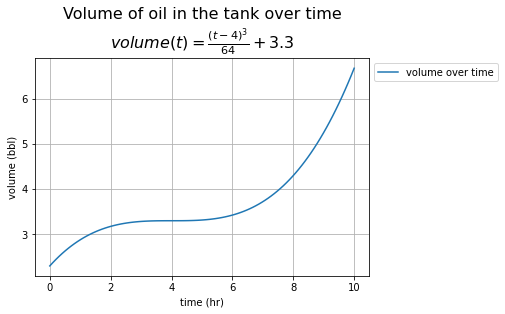

In [14]:
import numpy as np
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
# not needed here
# ax.axhline(y=0, color='black')
# ax.axvline(x=0, color='black')

plt.title(
    'Volume of oil in the tank over time\n'
    r'$ volume(t) = \frac{(t - 4)^3}{64} + 3.3 $', fontsize=16)

# plotting the volume
def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='volume over time')

plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



We want to find the flow rate into the tank at any point in time, using the function above as the input.

### Implementing an `average_flow_rate` function

Let's start simple by calculating the flow rate intuitively. We will be writing a function `average_flow_rate(v, t1, t2)` that takes a volume function `v(t)` and a start and end time `t1` and `t2`.
The function should return a number that is the average flow rate into the tank on the time interval, that is, the return will be measuring the number of barrels per hour entering the tank.



The way to calculate the average flow is the following:

$
\text{average flow rate} = \frac{\text{change in volume}}{\text{elapsed time}} \text{, measured in }\frac{barrels}{hour}
$

As we're lucky enough to have a function that returns the volume in the tank $ V $ as a function of time $ t $, we can do:

$
\text{average flow rate} = \frac{V(t2) - V(t1)}{t2 - t1}
$

Note that this is how we calculate rates of change in many other different context as well. For example the *speed* is the rate at which you cover distance with respect to time.

In any case, we can already write the function in Python:

```python
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)
```

Let's use the formula to calculate the average flow rate into the tank between the 4-hour mark and the 9-hour mark.

In [3]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)


def v(t):
    return (t - 4) ** 3 / 64 + 3.3

volume_at_beginning = v(4)
volume_at_end = v(9)

print('volume(start)={}'.format(volume_at_beginning))
print('volume(end)={}'.format(volume_at_end))

print('avg_flow_rate={}'.format(average_flow_rate(v, 4, 9)))

volume(start)=3.3
volume(end)=5.253125
avg_flow_rate=0.390625


Note that if we round, we have a change of volume of $ 5.25 - 3.3 = 1.95 \text{ bbl} $.

As we have an interval of 5 hours, the average flow rate should be around $ \frac{1.95 \text{ bbl}}{5 \text{ hours}} = 0.39 \frac{\text{bbl}}{\text{hours}} $

### Picturing the average flow rate with a secant line

Let's interpret what the average flow rate is giving us. In order to do that, let's draw the straight line that goes from `v(4)` to `v(9)`.

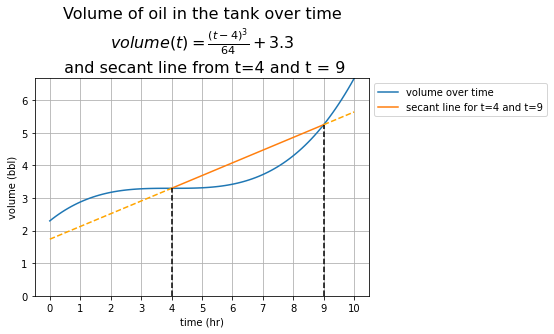

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import standard_form_fn

def v(t):
    return (t - 4) ** 3 / 64 + 3.3

secant_point_start = (4, v(4))
secant_point_end = (9, v(9))

secant_fn = standard_form_fn(secant_point_start, secant_point_end)

fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'
    r'$ volume(t) = \frac{(t - 4)^3}{64} + 3.3 $' 
    '\n and secant line from t=4 and t = 9', fontsize=16)

plt.ylim(0, v(10))
plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, v(ts), label='volume over time')

ts = np.linspace(4, 9, 100)
plt.plot(ts, secant_fn(ts), label='secant line for t=4 and t=9')

# this is just styling
ts = np.linspace(0, 4, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
ts = np.linspace(9, 10, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
vs = np.linspace(0, v(4))
ts = 4 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')
vs = np.linspace(0, v(9))
ts = 9 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')


plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



As you can see, the graph is higher for $ t = 9 $ than for $ t = 4 $, which means the volumn of oil increased during that period. This causes the secant line to *slope upward*.

> Mathematically, the *slope* is defined as the change in the vertical coordinate divided by the change in the horizontal coordinate.

Now, we see that the secant goes from $ v(4) $ to $ v(9) $. Therefore, the slope for the secant is then $ \frac{v(9) - v(4)}{9 - 4} $, which happens to be the average flow rate between $ t=4 $ and $ t=9 $.

> the slope of a secant line is the same as the average rate of change of a given function:

$
Slope = \frac{V(t_2) - V(t_1)}{t_2 - t_1}
$

![Secant slope is the average rate of change](../images/secant_slope_and_average_rate_of_change.png)

In [ ]:
### Negative rates of change

The secant line can have a negative slope, as can be seen in the image below.

    def decreasing_volume(t):
        if t < 5:
            return 10 - (t**2)/5
        else:
            return 0.2*(10-t)**2

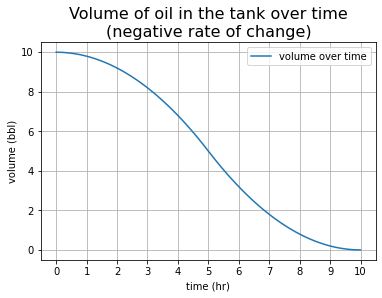

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import standard_form_fn

def v(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'
    '(negative rate of change)', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, [v(t) for t in ts], label='volume over time')


plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



If we perform the same exercise as before, for the time interval between $ t = 0 $ and $ t = 4 $, we can see that:

$
Slope = \frac{V(t2) - V(t1)}{t2 - t1}
$

In [32]:
def v(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

print('v(0)={}'.format(v(0)))
print('v(4)={}'.format(v(4)))

print('slope=average_rate_flow={}'.format((v(4) - v(0))/(4 - 0)))

v(0)=10.0
v(4)=6.8
slope=average_rate_flow=-0.8


Therefore:

$
Slope=-0.8 \frac{bbl}{hr}
$

Let's see that now the secant has a *downward slope*.

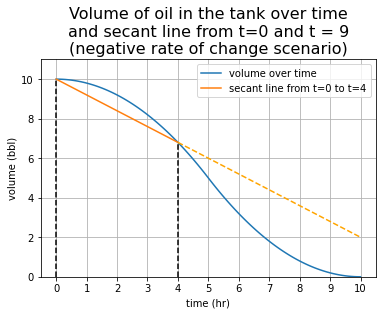

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import standard_form_fn

def v(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

secant_point_start = (0, v(0))
secant_point_end = (4, v(4))

secant_fn = standard_form_fn(secant_point_start, secant_point_end)

fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'    
    'and secant line from t=0 and t = 9\n'
    '(negative rate of change scenario)', fontsize=16)

plt.ylim(0, v(0) + 1)
plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, [v(t) for t in ts], label='volume over time')

ts = np.linspace(0, 4, 100)
plt.plot(ts, secant_fn(ts), label='secant line from t=0 to t=4')

# this is just styling
ts = np.linspace(4, 10, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
vs = np.linspace(0, v(0))
ts = np.zeros(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')
vs = np.linspace(0, v(4))
ts = 4 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')


plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



Therefore:
> the slope of the secant line between two given points gives us the average rate of change of the function

That fact will let us figure out how the flow rate changes over time.

#### Digging into the slope concept

We've seen in the previous section that given a function $ V(t) $, the slope of the *secant* between $ t1 $ and $ t2 $ was defined as:

$
Slope = \frac{V(t2) - V(t1)}{t2 - t1}
$

But let's see what does the slope represent in the equation of the secant line.

We know from the previous chapter that a line in its standard form can be represented as:

$
ax + by = c
$

If we clear out the $ y $ variable we get:

$
y = \frac{(-ax + c)}{b}
$

if we rename the coefficients the equation for the straight line can also be written as:

$
y = mx + n
$

Now, let's get back to the *secant*. We know that it goes through the points $ (t1, V(t1)) $ and $ (t2, V(t2)) $.

Therefore:

$
\begin{cases}
V(t1) = m t1 + n \\
V(t2) = m t2 + n
\end{cases} \Rightarrow \\
n = V(t1) - m t1 \Rightarrow \\
V(t2) = m t2 + V(t1) - m t1 \Rightarrow \\
V(t2) - V(t1) = m (t2 - t1) \Rightarrow \\
m = \frac{V(t2) - V(t1)}{t2 - t1}
$

That is, the *slope* of the secant line between two points of a function is the coefficient of the equation of the line when written as $ y = mx + n $.

## Plotting the average flow rate over time

If we want to get the flow rate function when the volume function is known we will get to the flow rate as a function of time.

By recalling what we've just seen about the slope of the secant line, that is the same as the average flow rate, we see the the average flow rate changes over time.

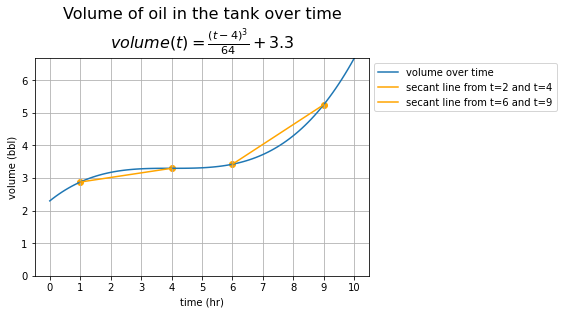

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import secant_line

def v(t):
    return (t - 4) ** 3 / 64 + 3.3


fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'
    r'$ volume(t) = \frac{(t - 4)^3}{64} + 3.3 $', fontsize=16)

plt.ylim(0, v(10))
plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, v(ts), label='volume over time')

# secant line #1
ts = np.linspace(1, 4, 100)
plt.plot(ts, secant_line(v, 1, 4)(ts), label='secant line from t=2 and t=4', color='orange')
plt.scatter([1, 4], [v(1), v(4)], color='orange')

# secant line #2
ts = np.linspace(6, 9, 100)
plt.plot(ts, secant_line(v, 6, 9)(ts), label='secant line from t=6 and t=9', color='orange')
plt.scatter([6, 9], [v(6), v(9)], color='orange')



plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

We see that the flow rate changes over time. For example, the slope is higher in the interval $ (6, 9) $ than it is in $ (1, 4) $.

What we can do to get us closer to our objective of getting the flow rate over time, is to break up the 10 hour perioid in smaller intervals of a fixed duration (example, 10 hour, one-hour intervals) and calculate the average flow rate for each *sub-period*.

We will name this function as:

```python
interval_flow_rates(v, t1, t2, dt)
```

where `v` is the volume function, `t1` and `t2` are the starting and ending times, and `dt` is the fixed duration of the time intervals.

The function should return a list of pairs of time and flowrate:

```python
[(t0, flow_rate(t0)), (t1, flow_rate(t1)), ..., (tn, flow_rate(tn))]
```

Once we get this function, we would be able to plot those values as a *scatter plot*, alongside the real flow rate function and compare the results.

### Finding the average flow rate in different time intervals

At this point we're more or less ready to define the `interval_flow_rates(...)` using NumPy and the formula that gives us the slope of the secant line between two points, which is equal to the average flow rate:

In [10]:
import numpy as np

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    time_samples = np.arange(t1, t2, dt)
    return [(t, average_flow_rate(v, t, t + dt)) for t in time_samples]

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3 

for sample_point in interval_flow_rates(volume, 0, 10, 1):
    print(sample_point)


(0, 0.578125)
(1, 0.296875)
(2, 0.109375)
(3, 0.015625)
(4, 0.015625)
(5, 0.109375)
(6, 0.296875)
(7, 0.578125)
(8, 0.953125)
(9, 1.421875)


By looking at the results we see that:
+ the average flow rate is always positive &mdash; there is a net addition of oil into the tank in each hour.
+ the average flow rate hits its minimum around hours 3 and 4, and hits the maximum around hour 9.

### Plotting the interval flow rates

We can use a *scatter plot* to plot the data returned by the `interval_flow_rates(...)` function:

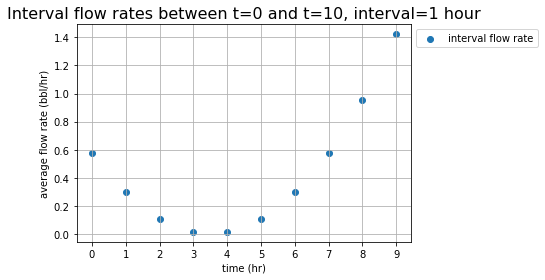

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    time_samples = np.arange(t1, t2, dt)
    return [(t, average_flow_rate(v, t, t + dt)) for t in time_samples]

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Interval flow rates between t=0 and t=10, interval=1 hour', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the interval flow rate as a scatter plot
series = interval_flow_rates(volume, 0, 10, 1)
times = [t for (t, _) in series]
rates = [r for (_, r) in series]
plt.scatter(times, rates, label='interval flow rate')


plt.xlabel(r'time (hr)')
plt.ylabel(r'average flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Note that the chart confirms our data analysis: the average flow rate hits the minimum between hours 3 and 4, and the maximum around t=9.

The actual flow rate function can be computed for that volume function and it is:

$
flow\_rate = \frac{3 (t-4)^2}{64}
$


If we plot that function along with the scatter plot, we'd get:

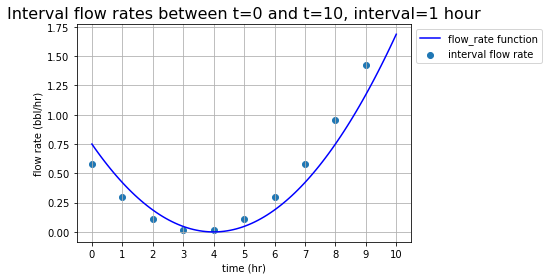

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    time_samples = np.arange(t1, t2, dt)
    return [(t, average_flow_rate(v, t, t + dt)) for t in time_samples]

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

# Plot
fig, ax = plt.subplots()

plt.title(
    'Interval flow rates between t=0 and t=10, interval=1 hour', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the interval flow rate as a scatter plot
series = interval_flow_rates(volume, 0, 10, 1)
times = [t for (t, _) in series]
rates = [r for (_, r) in series]
plt.scatter(times, rates, label='interval flow rate')

# plotting the flow rate function
ts = np.linspace(0, 10, 100)
plt.plot(ts, flow_rate(ts), label='flow_rate function', color='blue')


plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

See how the two plots *tell the same story*, and yet they don't quite match. The difference is that the scatter plot gives us the *average flow rates*, whereas the plot function gives us the *instantaneous value at any point in time*.

It is the same idea of the average speed on a long road trip: you might have a 70 mph average speed, but that does not mean you have kept 70 mph at all intervals.

As a matter of fact, if we slice up the time intervals in smaller periods, we'll get a scatter plot that resembles more the actual function.

For example, if we use 20-min intervals intead of 1-hour ones:

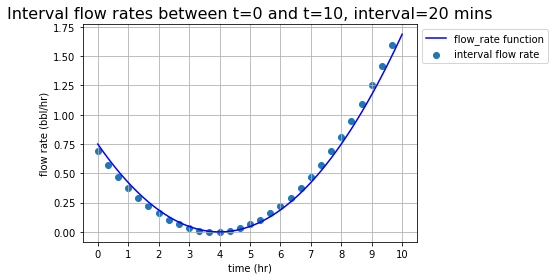

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    time_samples = np.arange(t1, t2, dt)
    return [(t, average_flow_rate(v, t, t + dt)) for t in time_samples]

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

# Plot
fig, ax = plt.subplots()

plt.title(
    'Interval flow rates between t=0 and t=10, interval=20 mins', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the interval flow rate as a scatter plot
series = interval_flow_rates(volume, 0, 10, 1/3)
times = [t for (t, _) in series]
rates = [r for (_, r) in series]
plt.scatter(times, rates, label='interval flow rate')

# plotting the flow rate function
ts = np.linspace(0, 10, 100)
plt.plot(ts, flow_rate(ts), label='flow_rate function', color='blue')


plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

This is a lot closer to what the actual flow rate function provides.

## Aproximating instantaneous flow rates

As seen in the previous section, as we make the time intervals in our `interval_flow_rate(...)` smaller and smaller we will get closer to the real function that gives us the instant flow rate over time.

Note however that we cannot make the interval zero:

$
average\_flow\_rate(t) = \frac{V(t) - V(t)}{t - t} = \frac{0}{0}
$

In calculus, there's an operation called the *derivative* that sidesteps this division problem and that will tell us what the instantenous rate of change is.

In this section we will write a function `instantaneous_flow_rate(v, t)` that will take a volume function `v(t)` and a single point in time `t`, and will return an approximation of the instantaneous rate an which oil is flowing into the tank.

Once we have that function, we'll be able to write a *curried* version of `instantaneous_flow_rate(v, t)` called `get_flow_rate_function(v)`.

In [ ]:
### Finding the slope of small secant lines

In this section we will start zooming in the volume function in a certain interval, to demonstrate that in the process the secant lines become closer and closer to the volume function.

Let's start plotting the original function:

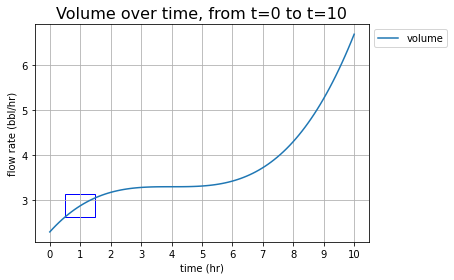

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0 to t=10', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the volume function
ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='volume')

rect = patches.Rectangle((0.5, volume(0.5)), 1, .5, edgecolor='b', facecolor='none')
ax.add_patch(rect)

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Let's focus now on that smaller interval, on which we see that the volume is somewhat curvy.

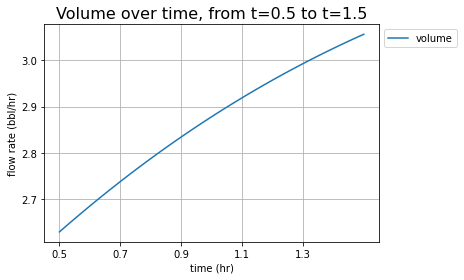

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0.5 to t=1.5', fontsize=16)

plt.xticks(np.arange(0.5, 1.5, step=.2))

# plotting the volume function
ts = np.linspace(0.5, 1.5, 100)
plt.plot(ts, volume(ts), label='volume')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

If we know write the secant lines between `0.6` and `1.0` and between `1.0` and `1.4` we get:

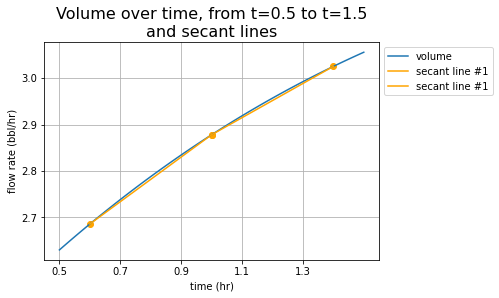

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import secant_line

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0.5 to t=1.5\n'
    'and secant lines', fontsize=16)

plt.xticks(np.arange(0.5, 1.5, step=.2))

# plotting the volume function
ts = np.linspace(0.5, 1.5, 100)
plt.plot(ts, volume(ts), label='volume')

# plotting the secant_lines
ts = np.linspace(0.6, 1, 100)
plt.plot(ts, secant_line(volume, 0.6, 1)(ts), label='secant line #1', color='orange')
plt.scatter([0.6, 1], [volume(0.6), volume(1)], color='orange')

ts = np.linspace(1, 1.4, 100)
plt.plot(ts, secant_line(volume, 1, 1.4)(ts), label='secant line #2', color='orange')
plt.scatter([1, 1.4], [volume(1), volume(1.4)], color='orange')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

If we zoom even further (for example, between `0.9` and `1.1`) the graph looks more and more constant and closer to the actual line.

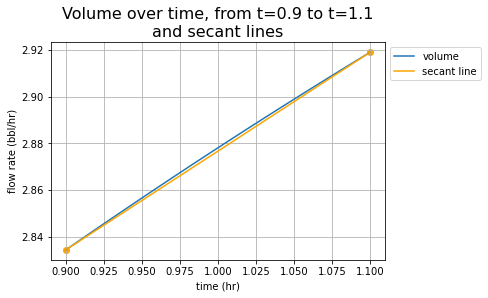

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import secant_line

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0.9 to t=1.1\n'
    'and secant lines', fontsize=16)

plt.xticks(np.arange(0.9, 1.1, step=.025))

# plotting the volume function
ts = np.linspace(0.9, 1.1, 100)
plt.plot(ts, volume(ts), label='volume')

# plotting the secant_line
ts = np.linspace(0.9, 1.1, 100)
plt.plot(ts, secant_line(volume, 0.9, 1.1)(ts), label='secant line', color='orange')
plt.scatter([0.9, 1.1], [volume(0.9), volume(1.1)], color='orange')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

If we zoom once more betwen `t = 0.99` and `t = 1.01`, the volume will become indistiguishable from a straight line.

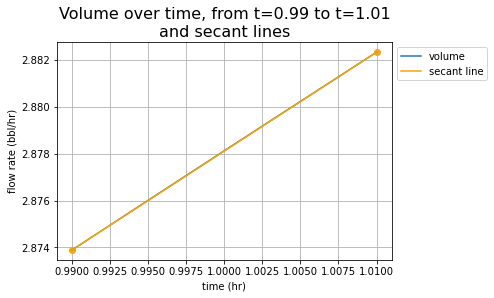

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import secant_line

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0.99 to t=1.01\n'
    'and secant lines', fontsize=16)

plt.xticks(np.arange(0.99, 1.01, step=.0025))

# plotting the volume function
ts = np.linspace(0.99, 1.01, 100)
plt.plot(ts, volume(ts), label='volume')

# plotting the secant_line
ts = np.linspace(0.99, 1.01, 100)
plt.plot(ts, secant_line(volume, 0.99, 1.01)(ts), label='secant line', color='orange')
plt.scatter([0.99, 1.01], [volume(0.99), volume(1.01)], color='orange')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In summary, the closer we zoom in, the more the volume function looks like a straight line, and the more the secant line approximates to the volume function.

> There is a best line approximating a curve graph at any point.

In practice, we see that the slopes of the secant line on smaller intervals *converge* to a single value:

In [34]:
from my_linear_equations import average_rate

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

print(average_rate(volume, 0.5, 1.5))
print(average_rate(volume, 0.9, 1.1))
print(average_rate(volume, 0.99, 1.01))
print(average_rate(volume, 0.999, 1.001))
print(average_rate(volume, 0.9999, 1.0001))
print(average_rate(volume, 0.99999, 1.00001))

0.42578125
0.4220312499999988
0.42187656249998945
0.42187501562509583
0.42187500015393936
0.4218750000002602


Thus, we see that the number we're approaching for the instant flow rate at `t=1.0` is `0.421875`.

We know that the slope at `t=1.0` is then `0.421875`.
We can plot the line with that slope along with the volume curve:

$
y = mx + n \text{, m=0.421875} \\
V(1.0)=2.878125 \Rightarrow n=2.878125 - 0.421875
$

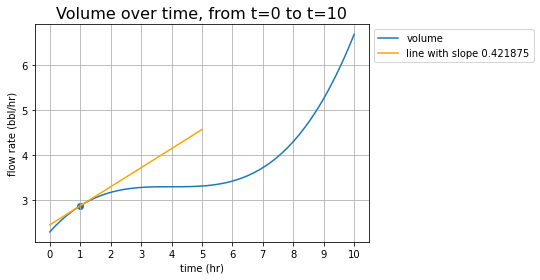

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

def line_function(t):
    return 0.421875 * t + (2.878125 - 0.421875)

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0 to t=10', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the volume function
ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='volume')

ts = np.linspace(0, 5, 100)
plt.plot(ts, line_function(ts), label='line with slope 0.421875', color='orange')

plt.scatter(1, volume(1), color='C0')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()    

This line is called the *tangent line* to the graph at the point `t=1`. This line lies flat against the graph of the curve at that point.

The tangent line is the line that best approximates the curve's graph, its slope is the best measure of the instantaneous slope of the graph, and therefore, gives us the best approximation to the instantaneous rate.

Actually, if we use the instantaneous flow_rate function we would get the same value:

In [42]:
def flow_rate(t):
    return 3*(t-4)**2 / 64

print(flow_rate(1))    

0.421875


It must be noted that to have a tangent line, the function needs to be *'smooth'*. If the function does not qualify to this *smoothness*, there'll be no line of best approximation.

> When we can find a tangent line to the graph of a function at a point, its slope is called the **derivative of the function at that point**.

In our previous example, the derivative of the volume function at the point `t=1` is 0.421875, which is the slope of the tangent line at that point.

### Building the instantaneous flow rate function

In the previous section we saw that it is very easy for the human eye to see what is the number the slope of the tangent line is converting to. However, that is not that simple for a Python based algorithm.

However, brute force approaches are easy to implement in Python. For example, we can calculate slopes of smaller and smaller secant lines until they stabilize to some fixed number of decimal digits.

When using that approach, we just need to set up some criteria &mdash; for example, find the slopes of a series of secant lines, each a tenth as wide as the previous one, until the value stabilizes up to four decimal places.

If we harvest the previous data we computed for the slope at `1.0` and put it on a table:

| Secant line interval | Secant line slope   |
| :------------------- | :------------------ |
| 0.5 to 1.5           | 0.42578125          |
| 0.9 to 1.1           | 0.4220312499999988  |
| 0.99 to 1.01         | 0.42187656249998945 |
| 0.999 to 1.001       | 0.42187501562509583 |

In the last two computed values, the slope is `0.4218` (i.e. the secant line slope for the two values is less than $ 10^{-4} $), so we could say that the slope of the secant line at 1.0 is `0.4219`.

Also, it is very easy to programmatically detect if after a certain (large) number of iterations, we haven't converged to the specified number of digits. In that case, we can say that there's no line of best approximation, and therefore, no derivative at that point.

Let's define this Python function:

In [2]:
from my_linear_equations import average_rate

def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** (-digits)
    h = 1
    approx = average_rate(v, t - h, t + h)
    for i in range(0, 2 * digits):
        h = h / 10
        next_approx = average_rate(v, t - h, t + h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception('Derivative did not converge in {} iterations'.format(2 * digits))


def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

print(instantaneous_flow_rate(volume, 1.0))


0.421875


### Currying and plotting the instantaneous flow rate function

Now, we have everything in our toolbox to come up with a Python function that will give us the flow rate function, given the volume function.

And once we have the function, we can finally plot it.

| NOTE: |
| :---- |
| Similarly, we will be able to generalize the approach to obtain the rate of change function for any function. |

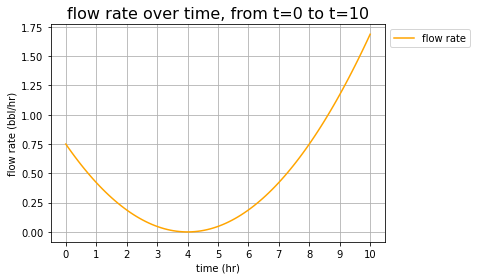

In [4]:
from my_linear_equations import instantaneous_rate
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

def get_flow_rate_function(v):
    def flow_rate_function(t):
        return instantaneous_rate(v, t)
    return flow_rate_function

# Plot
fig, ax = plt.subplots()

plt.title(
    'flow rate over time, from t=0 to t=10', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the flow_rate function
ts = np.linspace(0, 10, 100)
flow_rate = get_flow_rate_function(volume)
plt.plot(ts, [flow_rate(t) for t in ts], label='flow rate', color='orange')


plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()        

With this we have completed the first major goal of the chapter:
> given a `volume` function, compute the corresponding `flow_rate_function`.

This procedure is called *taking a derivative*, and its physical significance as we've seen is that:
> given function, the *derivative* at any given point gives us the instantaneous rate of change of the function, provided that the original functions is sufficiently smooth.

In computer science terms, we can think of the *derivative* as an algorithm that given a function gives us another function that measures the rate of change of the original one:

![derivative as a transformation](../images/derivative_as_a_transformation.png)

In more strict terms, the derivative is a general procedure that works on any function $ f(x) $, which is smooth enough to have tangent lines at every point.

The derivative of a function $ f $ is written as $ f' $, so that $ f'(x) $ means the instantaneous rate of change of in $ f $ with respect to $ x $.

Specifically, $ f'(5) $ is the derivative of $ f(x) $ at $ x = 5 $, which is the slope of the tangent line to $ f $ at $ x = 5 $.

Another common notations you might find are:

$
\displaystyle
f'(x) = \frac{df}{dx} = \frac{d}{d}f(x)
$

The $ df $ and $ dx $ mean infinitesimal changes in $ f $ and $ x $. The notation $ \frac{d}{dx} $ means the operation of *taking the derivative with respect to $ x $.

This notation is especially meaningful, as it makes the derivative look like an operation that you apply to $ f(x) $ and that returns another function:

![derivative as a function](../images/derivative_as_a_function.png)


## Approximating the change in volume